In [1]:
# My Google Drive Mount하기!
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# 주제분석 (Thematic Analysis)

Thematic Analysis is considered as an **Unsupervised Learning**.

## Unsupervised Learning

* 관찰된 X를 설명하는 Z의 존재를 가정한다.
* Z는 은닉(hidden) 또는 잠재(latent) 변수

## Latent Variable (잠재변수)

* 관찰 불가능하거나 현재 데이터에 포함되지 않은 변수
* 주로 이론적으로 가정되는 개념 (사랑, 지능 등)
* 현재 가진 데이터의 내재적 구조를 잘 설명하게 해줌

## Thematic Analysis (주제분석)

* 텍스트에 대한 Unsupervised Learning
* Document의 Term Frequency에 영향을 미치는 Latent Variable을 가정한다.
* 위의 Latent Variable을 '주제(Topic)'라고 한다.
* 일상적 의미에서 주제와는 다름!

## Thematic Analysis의 방법

1. 행렬 분해에 의한 방법
    * Meaning: TDM을 분해한다는 의미임
    * Latent Semantic Analysis (LSA): "잠재 의미 분석"
    * Non-negative Matrix Factorization (NMF)
2. 확률 분포에 의한 방법
    * Latent Dirichlet Allocation

# 1. Latent Semantic Analysis (LSA)

1. TDM을 여러 Matrix의 곱으로 분해하는 방법
2. 주제가 Continuous Variable(연속 변수)이라고 가정한다. 
    * 여기서 주제는 일상적인 주제가 아니라, 3.7 등의 숫자로 표기되는 것으로 이해하자!
    * 이 주제가 Latent Variable로서, TDM에 영향을 미친다!
3. 여러 주제들에 Weight를 곱하여 더하면 TDM이 된다고 가정한다.
4. 주제들은 Term Frequency의 Variance(분산)을 설명한다.

## LSA의 기본 아이디어

1. TDM인 matrix X를 Z * W 의 형태로 분해하여 표현한다.
2. PCA(차원축소, Principal Component Analysis): TDM의 Term의 개수보다 주제의 수가 더 적음
    * 의미: X = Z * W 형태로 분해할 때,
        * X: m x n
        * Z: m x k
        * W: k x n
    * n > k 가 되어야 함을 의미함!
    * matrix X를 통해 각 Document를 표현했는데,
    * Column의 수가 훨씬 적어진 Z를 통해서 Document를 표현할 수 있게 되어,
    * "차원축소"라고 부른다!

## LSA의 특징

1. 계산이 비교적 단순함
2. 통계학에서 매우 많이 사용하는 기법
3. 주제의 해석이 어려움
4. 차원의 수를 정하기 어려움 (= 몇 개의 주제로 분해할 것인지 정하기 어려움)
5. 해가 무수히 많음

# 2. 특이값 분해 (SVD: Singular Value Decomposition)

## Matrix Decomposition (행렬 분해)
* 하나의 행렬을 여러 개의 행렬의 곱 형태로 타나내는 것
    1. LU 분해
    2. QR 분해
    3. 촐레스키 분해 (Cholesky Decomposition)
    4. 고유값 분해 (Eigen Decomposition)
    5. 특이값 분해 (Singular Value Decomposition)

## SVD (Singular Value Decomposition)

**Week 06 page 15 보면서 아래 내용 정독!**

1. matrix U: m x m
2. matrix Sigma: m x n (diagonal matrix, 대각선방향에만 숫자가 들어가고 나머지는 모두 zeros!, 이 matrix가 Singular Values임!)
3. matrix V_transpose: n x n

## Truncated SVD

**Week 06 page 16 보면서 아래 내용 정독!**

    1. Gray colours들만 남기고 모두 잘라버려도, 똑같은 matrix M을 얻을 수 있다!
    2. LSA로 연결시킬 수도 있다!
        * U*를 Z로 생각하고,
        * (Sigma* * V_transpose*)를 W로 생각하면,
        * LSA로 연결이 되는군!

## Dimentionality Reduction (차원축소)

1. TDM은 m개의 documents를 표현하기 위해 n개의 terms로 표현
2. U*는 m개의 documents를 k개의 차원으로 표현
3. n > k 이므로, documents를 나타내는 차원이 축소되었다고 이해할 수 있음!

## 차원축소를 하는 이유

1. Documents를 Term이 아닌, 의미상으로 재배치!
2. 동음이의어, Typo 등이 어느 정도 처리됨!
3. Documents에 존재하는 Noise가 줄어들어, Classification이 더 정확하게 됨!

# 3. 차원 축소(Dimentionality Redunction)의 시각적 이해

**Week 06 page 20~24 보면서 이해하기!**

# 4. Thematic Analysis를 위한 Data Cleaning

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://github.com/euphoris/datasets/raw/master/neurips.zip')
# Wow! 굳이 unzip을 하지 않더라도, 알아서 csv파일을 찾아서 읽어오는군!
print(df.shape)

(3920, 3)


In [3]:
df.head()

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [4]:
df.tail()

,year,title,abstract
3915,2017,"On Separability of Loss Functions, and Revisit...",We revisit the classical analysis of generativ...
3916,2017,Maxing and Ranking with Few Assumptions,PAC maximum ...
3917,2017,On clustering network-valued data,"Community detection, which focuses on clusteri..."
3918,2017,A General Framework for Robust Interactive Lea...,We propose a general framework for interactive...
3919,2017,Multi-view Matrix Factorization for Linear Dyn...,We consider maximum likelihood estimation of l...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

## (1) TfidfVectorizer 사용하기

In [7]:
cv = TfidfVectorizer(
    max_features=2000,
    stop_words='english'
)

In [8]:
tdm_cv = cv.fit_transform(df['abstract'])
print(tdm_cv.shape)

(3920, 2000)


In [10]:
tfidf_trans = TfidfTransformer()
tdm_tfidf = tfidf_trans.fit_transform(tdm_cv)
print(tdm_tfidf.shape)

(3920, 2000)


In [11]:
term_list = cv.get_feature_names()
term_list[:5]

['000', '10', '100', '20', '2d']

# 5. LSA Practice

In [13]:
from sklearn.decomposition import TruncatedSVD

term이 모두 2000개이므로, 주제의 개수를 2000개보다 작은 수로 두어서 Decomposition해보자!

In [16]:
svd = TruncatedSVD(
    n_components=100,
    random_state=1234
)

svd.fit(tdm_tfidf)

# Topic X Term 관계 확인 (Topic:100, Term:2000)
print(svd.components_.shape)

(100, 2000)


In [17]:
pd.DataFrame(svd.components_).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.008605,0.016955,0.007625,0.008127,0.010135,0.022970,0.021718,0.029093,0.007309,0.009136,0.014342,0.013650,0.013311,0.016722,0.007634,0.041844,0.026897,0.016004,0.032578,0.019608,0.031048,0.018677,0.031012,0.023251,0.011909,0.006758,0.033432,0.008511,0.023353,0.005936,0.007007,0.007995,0.012437,0.018849,0.007487,0.031801,0.011470,0.021664,0.021592,0.010794,...,0.009252,0.017954,0.011837,0.012522,0.019758,0.006965,0.016983,0.010339,0.006148,0.008944,0.021252,0.036007,0.006996,0.007659,0.007308,0.028208,0.012153,0.014232,0.010296,0.012249,0.019479,0.022293,0.026843,0.022749,0.020463,0.008321,0.015103,0.022974,0.019263,0.043302,0.010073,0.007458,0.018163,0.038230,0.021821,0.012636,0.014570,0.008218,0.020842,0.016673
1,0.009501,0.027783,0.011642,0.007160,0.028617,0.088592,0.028147,0.021158,-0.005246,0.010932,-0.036618,-0.008049,-0.002978,0.014483,0.009539,0.020091,0.016196,0.012827,-0.010246,0.005293,-0.020314,0.002702,-0.015634,-0.020424,0.021116,0.015205,-0.023001,0.016535,0.053401,-0.002105,-0.001882,-0.002197,-0.001052,0.025936,0.004524,-0.030779,-0.000025,0.001372,-0.003311,0.003551,...,-0.006282,-0.017446,-0.011170,-0.005022,0.048186,0.018679,0.022244,0.006675,0.010092,0.015059,0.035171,0.120648,-0.003463,0.000937,-0.004714,0.016076,0.003740,-0.005370,0.007603,0.008861,0.003284,-0.013676,0.026038,0.004476,-0.010178,0.000530,0.001359,0.057058,0.049284,0.002820,-0.007416,0.003244,-0.007346,0.007285,-0.045123,-0.000948,0.006929,-0.001115,-0.000681,-0.010715
2,-0.002109,0.010170,0.005301,0.001593,0.007016,0.028117,0.010597,0.009882,0.005012,0.012557,-0.002486,0.019716,0.009216,0.007805,0.011220,-0.006891,-0.007523,-0.001600,0.024246,0.015497,0.017397,0.009159,0.130108,0.108780,0.004946,0.003842,0.036100,0.008742,0.004085,0.025785,-0.001785,0.008286,0.007977,0.022901,-0.004089,0.029978,0.006927,0.005166,0.000027,0.005235,...,-0.008612,-0.004288,0.008661,-0.012921,0.011677,0.004385,0.011188,-0.004728,-0.001561,-0.002265,0.003392,0.036980,-0.003064,0.003439,-0.003722,0.002495,0.010038,0.006413,0.010411,0.003835,0.001245,-0.008138,0.008082,-0.008624,-0.013411,-0.005074,-0.011883,-0.008355,-0.006404,0.004882,0.003426,0.006873,0.003986,-0.000898,0.036988,-0.000785,0.002514,-0.000267,-0.010195,0.007884
3,-0.007018,-0.023758,-0.003681,-0.004631,-0.024509,-0.080600,-0.008986,-0.005954,-0.006242,-0.010901,-0.011798,-0.004106,-0.001040,0.007723,0.007037,-0.016283,0.019980,-0.003618,-0.022192,-0.011252,-0.019471,-0.010140,0.018975,0.015426,-0.001479,-0.007346,-0.026720,0.006239,0.040313,0.005073,-0.006171,-0.003322,-0.003404,-0.008727,-0.003949,0.011494,0.004939,-0.010425,-0.006284,-0.003825,...,-0.000870,-0.013587,0.001348,-0.004037,-0.030192,-0.008625,-0.008933,0.000905,-0.013796,-0.015786,-0.031158,-0.075468,0.000892,0.003434,0.001306,-0.005589,0.001189,-0.024091,-0.018836,-0.011325,-0.015892,0.000619,-0.001924,0.001100,-0.000724,0.012352,-0.009139,-0.023952,-0.013919,-0.016600,-0.006514,0.003203,-0.012926,0.006355,-0.012055,-0.005286,-0.006130,0.000918,-0.004420,-0.009347
4,-0.002027,0.010843,0.004430,0.001857,-0.005892,-0.017936,-0.004289,0.008305,-0.001244,-0.004110,0.060596,-0.002395,-0.000242,0.013356,0.005412,-0.011931,-0.000457,0.003260,0.013771,0.006568,0.021026,-0.000581,0.009700,-0.004094,0.027489,0.021226,-0.047703,0.021364,0.091461,0.015228,0.000589,-0.000505,0.001465,0.017594,0.010716,0.027954,0.004520,-0.004291,0.002197,-0.004010,...,0.001414,0.008954,-0.000330,-0.040437,-0.000609,-0.002192,-0.013106,0.000962,0.001662,-0.020280,-0.004748,0.025130,-0.004580,-0.013631,-0.009639,0.002776,-0.002786,-0.008604,-0.016083,-0.025303,0.018017,-0.010475,0.041176,0.002181,-0.006202,0.000930,0.013560,-0.067286,-0.057564,-0.0

* **Week 06 page 12 확인!**
* LSA의 matrix W인 듯...? (k X n)
* Topic 개수 X Term 개수
* 1번째 Topic이 1만큼 증가하게 되면, 1번째 Term이 0.005만큼 증가하게 된다!
    * = 1번째 Topic이 1000만큼 증가하게 되면, 1번째 Term이 5만큼 증가하게 된다!

**algorithm**이라는 Term의 Topics에 대해 분석해보자!

In [18]:
algorithm_idx = term_list.index('algorithm')
print(algorithm_idx)

60


In [19]:
# algorithm 이라는 term과 100개의 Topics들이 각각 어떤 관계를 가지는지 보여주는군!
svd.components_[:, algorithm_idx]

array([ 0.09017211, -0.08349566,  0.0197517 , -0.00415799, -0.03128814,
       -0.01416279,  0.04793333, -0.0478717 ,  0.00789152, -0.00092135,
        0.00687022,  0.01182421, -0.00356513,  0.00022512,  0.0353117 ,
       -0.02014688, -0.05968747, -0.00613552, -0.00435642,  0.03358533,
        0.00033731,  0.02941385, -0.00474029, -0.00805193,  0.02149677,
        0.0203224 ,  0.02082819, -0.00784514, -0.04657884,  0.0148815 ,
        0.03268137, -0.00616516,  0.02201845,  0.01929679,  0.00622997,
       -0.01965458,  0.00938441, -0.02500519,  0.02105032, -0.00359691,
       -0.00121122, -0.00750286,  0.01747331,  0.00644604,  0.00603278,
        0.00152763, -0.03979095, -0.00158416, -0.02961133,  0.03494791,
        0.02605361, -0.03162332,  0.0440188 ,  0.01829442, -0.0174298 ,
       -0.00528972, -0.02195958,  0.01206409,  0.02112437, -0.01967392,
        0.01790708, -0.01071744,  0.02447532,  0.01482222,  0.00046525,
        0.02588785, -0.00973948, -0.01681605, -0.02969489, -0.03

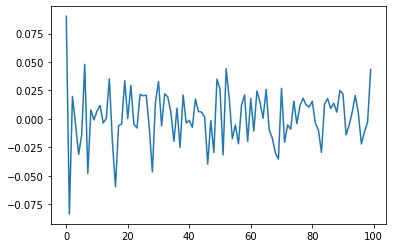

''

In [20]:
import matplotlib.pyplot as plt

plt.plot(svd.components_[:, algorithm_idx])
plt.show()
;

저 최대값을 가진 Topic이 무엇인지 찾아보자!

In [22]:
algorithmbestTopic_idx = svd.components_[:, algorithm_idx].argmax()
print(algorithmbestTopic_idx)

0


따라서, Index 0의 Topic이 **algorithm**이라는 단어와 가장 큰 관련성을 지닌다!

이제, Index 0의 Topic과 각 Term들의 관계를 알아보자!

In [23]:
topic0_df = pd.DataFrame({
    'term': term_list,
    'loading': svd.components_[algorithmbestTopic_idx, :]
})

topic0_df = topic0_df.sort_values('loading', ascending=False).reset_index(drop=True)
topic0_df.head()

,term,loading
0,learning,0.094721
1,model,0.093150
2,algorithm,0.090172
3,data,0.089859
4,models,0.084821


* Wow! Index 0의 Topic과 **algorithm** Term이 3번째로 큰 관련성을 지니고 있었군!
* learning, model, data, models 모두 **algorithm**이라는 단어와 큰 관련이 있어보이네!
* 이렇게, **Themantic Analysis**가 가능하겠군! Wow!

# 6. 병렬 분석을 통한 차원 크기 결정하기

앞서 우리는 임의로 100개의 차원 크기를 fix했는데, 이걸 실제로 어떤 기준으로 결정해야 할까?

In [24]:
import numpy as np

row_cnt, col_cnt = tdm_tfidf.shape
print(row_cnt, col_cnt)

3920 2000


In [25]:
# matrix를 row를 기준으로 무작위로 추출해서 새로운 TDM을 만든다!
def ResampleRows(dataframe):
    return np.random.choice(
        dataframe,
        size=dataframe.shape[0]
    )

In [27]:
np.random.seed(1234)
tdm2_tfidf = np.apply_along_axis(ResampleRows, axis=0, arr=tdm_tfidf.A)
# 이제 새로운 matrix tdm2_tfidf는 documents X term의 관계가 모두 망가뜨려진 상태가 된다.

In [28]:
print(tdm2_tfidf.shape)

(3920, 2000)


In [29]:
svd2 = TruncatedSVD(
    n_components=100,
    random_state=1234
)

svd2.fit(tdm2_tfidf)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
             random_state=1234, tol=0.0)

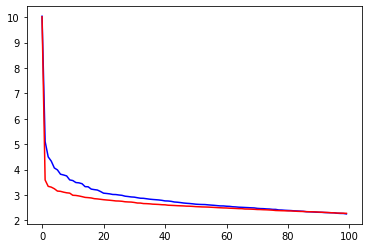

''

In [30]:
# 'singular values_': 각각의 차원(Topic)이 가지는 중요성을 의미함! (diagonal matrix에서 그 diagonal axis에 존재하는 숫자들임)

plt.plot(svd.singular_values_, color='blue')
plt.plot(svd2.singular_values_, color='red')
plt.show()
;

오른쪽 끝 부분을 자세히 살펴보자!

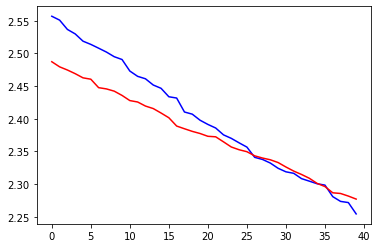

''

In [31]:
plt.plot(svd.singular_values_[60:], color='blue')
plt.plot(svd2.singular_values_[60:], color='red')
plt.show()
;

**Conclusion**
* 기존의 svd가 각 Topic들이 설명력이 강하다. (앞 부분 Topic들의 중요성이 더 높으므로!)
* svd2의 경우, term x term의 관계가 깨져버렸으므로, 주제 분석을 하기 어려워져서, 중요성이 급감하게 된다!

In [32]:
# svd2가 svd보다 높아지는 point를 찾아보자!
print(np.argwhere(svd.singular_values_ <= svd2.singular_values_))

[[86]
 [87]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]
 [94]
 [96]
 [97]
 [98]
 [99]]


In [33]:
print(np.argwhere(svd.singular_values_ <= svd2.singular_values_)[0])

[86]


**Conclusion**
* Therefore, 우리는 86 차원의 수만큼만 필요함을 알 수 있다!

**86차원으로 다시 svd 분석을 해보자!**
* 다시 svd를 만들 필요 없이, 기존의 svd 생성된 것에서 86 이후로는 무시하면 된다!

# 7. 회전 (Rotation)

**Week 06 page 25~35 정독하기!**

# 8. 회전과 결과 해석

In [35]:
! pip install factor_analyzer
from factor_analyzer.rotator import Rotator

     |████████████████████████████████| 40 kB 4.3 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=39bb99069ee8b7d4aa77567977a59f46548bab3c83ef493773984eaff1cf0550
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [36]:
rotator = Rotator(method='varimax')

# Transpose(T)를 반드시 해줘야 함!
rot = rotator.fit_transform(svd.components_.T)
print(rot.shape)

(2000, 100)


In [37]:
loading = rot.T
print(loading.shape)

(100, 2000)


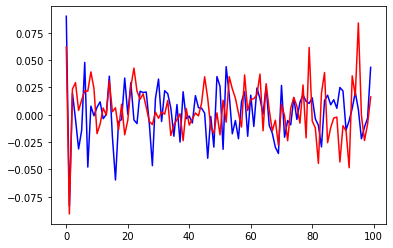

''

In [38]:
plt.plot(svd.components_[:, algorithm_idx], color='blue')
plt.plot(loading[:, algorithm_idx], color='red')
plt.show()
;

**WOW! 각 Topic 간의 분산이 엄청 커졌고, 명확히 구분이 되었구나!**

In [40]:
algorithmbesttopic_idx = loading[:, algorithm_idx].argmax()
print(algorithmbesttopic_idx)

95


In [41]:
topic95_df = pd.DataFrame({
    'term': term_list,
    'loading': loading[algorithmbesttopic_idx, :]
})

topic95_df = topic95_df.sort_values('loading', ascending=False).reset_index(drop=True)
topic95_df.head()

,term,loading
0,greedy,0.412929
1,coordinate,0.131194
2,descent,0.115209
3,epsilon,0.113744
4,dimensional,0.110544


* Wow! Index 95의 Topic과 **greedy** Term이 가장 큰 관련성을 지니고 있었군!
* varimax rotation을 하기 전과 후의 Topic이 달라지는군!

## 이제 각 연도별로 Index 95 Topic의 흐름을 살펴보자!

In [42]:
# z: # of documents X # of topics
DocXTopic = svd.transform(tdm_tfidf)
print(DocXTopic.shape)

(3920, 100)


In [43]:
DocXTopic = DocXTopic @ rotator.rotation_
print(DocXTopic.shape)

(3920, 100)


각 Document 별로 maxtopic_idx와의 관계 확인!

In [44]:
DocXTopic[:, algorithmbesttopic_idx]

array([-0.08731683, -0.00120689,  0.01422819, ...,  0.03893093,
       -0.01665889,  0.02792362])

In [45]:
topic95yearly_df = pd.DataFrame({
    'year': df['year'],
    'topic 95': DocXTopic[:, algorithmbesttopic_idx]
})

topic95yearly_df.head()

,year,topic 95
0,2007,-0.087317
1,2007,-0.001207
2,2007,0.014228
3,2007,0.017227
4,2007,0.020837


In [46]:
topic95yearly_df.groupby('year').agg('mean')

,topic 95
year,
2007,0.013055
2008,0.011702
2009,0.011384
2010,0.009489
2011,0.016179
2012,0.016666
2013,0.014239
2014,0.016538
2015,0.016260


2007년부터 2017년까지 Algorithm에 관한 이야기가 점점 줄어들었는지 OR 늘었는지 분석할 수 있겠군!

# 9. NMF를 이용한 주제분석 (Non-negative Matrix Factorization)

**Week 06 page 36~40 정독하기!**

# 10. NMF Practice

In [47]:
from sklearn.decomposition import NMF

In [48]:
nmf = NMF(
    n_components=86,
    random_state=1234
)

DocXTopic = nmf.fit_transform(tdm_tfidf)
print(DocXTopic.shape)

(3920, 86)


In [49]:
loading = nmf.components_
print(loading.shape)

(86, 2000)


In [50]:
algorithm_idx = term_list.index('algorithm')
print(algorithm_idx)

60


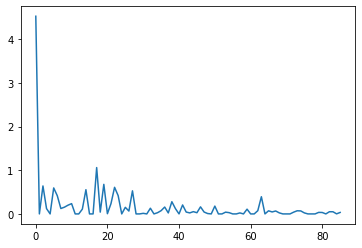

''

In [51]:
plt.plot(loading[:, algorithm_idx])
plt.show()
;

In [52]:
algorithmbesttopic_idx = loading[:, algorithm_idx].argmax()
print(algorithmbesttopic_idx)

0


In [53]:
topic0_df = pd.DataFrame({
    'term': term_list,
    'loading': loading[algorithmbesttopic_idx, :]
})

topic0_df = topic0_df.sort_values('loading', ascending=False).reset_index(drop=True)
topic0_df.head()

,term,loading
0,mixture,86.569133
1,em,42.472420
2,mixtures,31.502294
3,components,30.303031
4,component,18.528102


In [56]:
topic0yearly_df = pd.DataFrame({
    'year': df['year'],
    'topic 0': DocXTopic[:, algorithmbesttopic_idx]
})

topic0yearly_df.head()

,year,topic 0
0,2007,0.000000
1,2007,0.000000
2,2007,0.000000
3,2007,0.000211
4,2007,0.000000


In [57]:
topic0yearly_df.groupby('year').agg('mean')

,topic 0
year,
2007,0.000094
2008,0.000099
2009,0.000107
2010,0.000092
2011,0.000070
2012,0.000129
2013,0.000136
2014,0.000098
2015,0.000088


2007년부터 2017년까지 Algorithm에 관한 이야기가 점점 줄어들었는지 OR 늘었는지 분석할 수 있겠군!

**Neural** 이라는 Term은 어떻게 Trend가 되었는지 한 번 볼까? :)

In [69]:
neural_idx = term_list.index('neural')
neural_idx

1185

In [70]:
neuralbesttopic_idx = loading[:, neural_idx].argmax()
print(neuralbesttopic_idx)

4


In [71]:
topic4_df = pd.DataFrame({
    'term': term_list,
    'loading': loading[neuralbesttopic_idx, :]
})

topic4_df = topic4_df.sort_values('loading', ascending=False).reset_index(drop=True)
topic4_df.head()

,term,loading
0,neurons,8.329913
1,activity,6.024382
2,population,5.095659
3,dynamics,3.645878
4,recordings,3.332440


In [72]:
topic4yearly_df = pd.DataFrame({
    'year': df['year'],
    'topic 4': DocXTopic[:, neuralbesttopic_idx]
})

topic4yearly_df.head()

,year,topic 4
0,2007,0.000000
1,2007,0.000000
2,2007,0.000000
3,2007,0.007340
4,2007,0.000467


In [73]:
topic4yearly_df.groupby('year').agg('mean')

,topic 4
year,
2007,0.000658
2008,0.000758
2009,0.000520
2010,0.000805
2011,0.000644
2012,0.000512
2013,0.000832
2014,0.000693
2015,0.000432


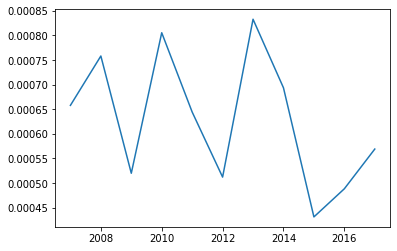

''

In [74]:
plt.plot(topic4yearly_df.groupby('year').agg('mean'))
plt.show()
;

2007년부터 2017년까지 Neural에 관한 이야기가 이렇게 흘러왔군! Wow!